# **Analisis de datos de crédito**

In [4]:
# Librerias necesarias

from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from cargar_datos import cargar_dataset

In [5]:
# Configuración para que solo se muestren 2 decimales

pd.set_option("display.float_format", "{:.2f}".format)

### Parte 1 - Carga de Datos

In [6]:
df = cargar_dataset(usar_cache=True)

pd.set_option('display.max_columns', None)
df.head()

tipo_credito      fecha_prestamo  capital_prestado  plazo_meses  \
0             4 2025-01-07 14:40:36        1852560.00           12   
1             4 2025-01-09 11:18:48        3181080.00            6   
2             9 2024-12-26 18:52:57         670200.00            5   
3             9 2024-12-04 14:20:50         506806.80            2   
4             4 2025-04-30 18:41:57         999780.00           10   

   edad_cliente   tipo_laboral  salario_cliente  total_otros_prestamos  \
0            32       Empleado          3500000                1000000   
1            34       Empleado          5000000                2000000   
2            34  Independiente          5000000                2000000   
3            25  Independiente          3000000                 900000   
4            26       Empleado          2000000                 600000   

   cuota_pactada  puntaje  puntaje_datacredito  cant_creditosvigentes  \
0         128650    95.23               795.00                      0   
1         441817    95.23               796.00                      0   
2         108632    95.23               727.00                      5   
3         199684    95.23               864.00                      8   
4          92509    95.23               771.00                      0   

   huella_consulta  saldo_mora  saldo_total  saldo_principal  \
0                2        0.00         0.00              NaN   
1                7        0.00         0.00              NaN   
2                0        0.00    274561.00        274561.00   
3                1        0.00     27564.00         27564.00   
4                3        0.00         0.00              NaN   

   saldo_mora_codeudor  creditos_sectorFinanciero  creditos_sectorCooperativo  \
0                  NaN                          0                           0   
1                  NaN                          0                           0   
2                  NaN                          2                           0   
3                  NaN                          1                           0   
4                  NaN                          0                           0   

   creditos_sectorReal  promedio_ingresos_datacredito tendencia_ingresos  \
0                    0                      916148.00          Creciente   
1                    0                     4473774.00          Creciente   
2                    1                            NaN                NaN   
3                    6                            NaN                NaN   
4                    0                       61000.00          Creciente   

   Pago_atiempo  
0             1  
1             1  
2             1  
3             1  
4             1

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10763 entries, 0 to 10762
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   tipo_credito                   10763 non-null  int64         
 1   fecha_prestamo                 10763 non-null  datetime64[ns]
 2   capital_prestado               10763 non-null  float64       
 3   plazo_meses                    10763 non-null  int64         
 4   edad_cliente                   10763 non-null  int64         
 5   tipo_laboral                   10763 non-null  object        
 6   salario_cliente                10763 non-null  int64         
 7   total_otros_prestamos          10763 non-null  int64         
 8   cuota_pactada                  10763 non-null  int64         
 9   puntaje                        10763 non-null  float64       
 10  puntaje_datacredito            10757 non-null  float64       
 11  cant_creditosvi

###**2 - Exploracion Inicial de Datos**

###**Variables Numericas**

### Continuas
- capital_prestado
- salario_cliente
- cuota_pactada
- puntaje
- puntaje_datacredito
- saldo_mora
- saldo_total
- saldo_principal
- saldo_mora_codeudor
- promedio_ingresos_datacredito

### Discretas
- plazo_meses
- edad_cliente
- huella_consulta
- cant_creditosvigentes
- creditos_sectorFinanciero
- creditos_sectorCooperativo
- creditos_sectorReal
- total_otros_prestamos


###**Variables categoricas**

### Nominales
- tipo_credito --> (Politomica)
- tipo_laboral --> (Dicotomica)
- tendencia_ingresos --> (Politomica)

### Variables fecha

- fecha_prestamo

### Target

- Pago_atiempo

### Tipo de variables

In [8]:
#Cambiar variables object a category
objects = ["tipo_laboral", "tendencia_ingresos"]

for col in objects:
    df[col] = df[col].astype('category')

#Variable int a category
df["tipo_credito"] = df["tipo_credito"].astype("category")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10763 entries, 0 to 10762
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   tipo_credito                   10763 non-null  category      
 1   fecha_prestamo                 10763 non-null  datetime64[ns]
 2   capital_prestado               10763 non-null  float64       
 3   plazo_meses                    10763 non-null  int64         
 4   edad_cliente                   10763 non-null  int64         
 5   tipo_laboral                   10763 non-null  category      
 6   salario_cliente                10763 non-null  int64         
 7   total_otros_prestamos          10763 non-null  int64         
 8   cuota_pactada                  10763 non-null  int64         
 9   puntaje                        10763 non-null  float64       
 10  puntaje_datacredito            10757 non-null  float64       
 11  cant_creditosvi

### Analisis de nulos

In [9]:
#Analisis de cantidad numerica y porcentual de nulos por columna
def reporte_nulos(df: pd.DataFrame) -> pd.DataFrame:

    total = len(df)
    nulos = df.isna().sum()
    no_nulos = total - nulos
    unicos = df.nunique(dropna=True)
    dtypes = df.dtypes.astype(str)

    rep = pd.DataFrame({
        "columna": df.columns,
        "dtype": dtypes.values,
        "n_nulos": nulos.values,
        "%_nulos": (nulos.values / total) if total > 0 else 0,
        "n_no_nulos": no_nulos.values,
        "n_unicos": unicos.values
    })
    rep = rep.sort_values("%_nulos", ascending=False).reset_index(drop=True)
    return rep

reporte = reporte_nulos(df)
reporte

columna           dtype  n_nulos  %_nulos  \
0              tendencia_ingresos        category     2932     0.27   
1   promedio_ingresos_datacredito         float64     2930     0.27   
2             saldo_mora_codeudor         float64      590     0.05   
3                 saldo_principal         float64      405     0.04   
4                      saldo_mora         float64      156     0.01   
5                     saldo_total         float64      156     0.01   
6             puntaje_datacredito         float64        6     0.00   
7                 salario_cliente           int64        0     0.00   
8                    tipo_laboral        category        0     0.00   
9                    edad_cliente           int64        0     0.00   
10                    plazo_meses           int64        0     0.00   
11               capital_prestado         float64        0     0.00   
12                 fecha_prestamo  datetime64[ns]        0     0.00   
13                   tipo_credito        category        0     0.00   
14          total_otros_prestamos           int64        0     0.00   
15          cant_creditosvigentes           int64        0     0.00   
16                huella_consulta           int64        0     0.00   
17                  cuota_pactada           int64        0     0.00   
18                        puntaje         float64        0     0.00   
19     creditos_sectorCooperativo           int64        0     0.00   
20      creditos_sectorFinanciero           int64        0     0.00   
21            creditos_sectorReal           int64        0     0.00   
22                   Pago_atiempo           int64        0     0.00   

    n_no_nulos  n_unicos  
0         7831        46  
1         7833      5309  
2        10173         4  
3        10358      8647  
4        10607        55  
5        10607      8858  
6        10757       315  
7        10763      1385  
8        10763         2  
9        10763        54  
10       10763        18  
11       10763      7306  
12       10763     10758  
13       10763         6  
14       10763      1538  
15       10763        39  
16       10763        28  
17       10763      9836  
18       10763       248  
19       10763        11  
20       10763        33  
21       10763        24  
22       10763         2

Los datos nulos son estandarizados por pandas entonces no hace falta estandarizarlos en este caso

In [10]:
# Analisis de registros duplicados

df.duplicated().sum()

np.int64(0)

No hay registros duplicados que haya que elimnar

Balance variable objetivo

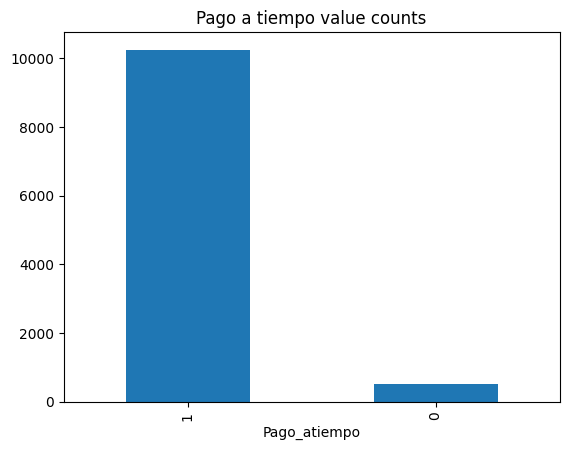

In [11]:
# Gráfica de balance de variable objetivo

df["Pago_atiempo"].value_counts().plot(kind="bar", title="Pago a tiempo value counts")
plt.show()

###**EDA**

###**Analisis Univariable**

### Variables Númericas

count        mean          std       min  \
capital_prestado              10763.00  2434315.00   1909642.76 360000.00   
plazo_meses                   10763.00       10.58         6.63      2.00   
edad_cliente                  10763.00       43.95        15.06     19.00   
salario_cliente               10763.00 17216431.46 355476717.60      0.00   
total_otros_prestamos         10763.00  6238869.65 118418316.94      0.00   
cuota_pactada                 10763.00   243617.41    210493.69  23944.00   
puntaje                       10763.00       91.17        16.47    -38.01   
puntaje_datacredito           10757.00      780.79       104.88     -7.00   
cant_creditosvigentes         10763.00        5.73         3.98      0.00   
huella_consulta               10763.00        4.23         3.06      0.00   
saldo_mora                    10607.00        7.75       225.96      0.00   
saldo_total                   10607.00    45937.41    106269.79      0.00   
saldo_principal               10358.00    40346.17     71242.44      0.00   
saldo_mora_codeudor           10173.00        0.26        21.77      0.00   
creditos_sectorFinanciero     10763.00        2.78         2.75      0.00   
creditos_sectorCooperativo    10763.00        0.27         0.72      0.00   
creditos_sectorReal           10763.00        1.30         1.82      0.00   
promedio_ingresos_datacredito  7833.00  2005156.81   2144116.15      0.00   
Pago_atiempo                  10763.00        0.95         0.21      0.00   

                                     25%        50%        75%            max  \
capital_prestado              1224831.00 1921920.00 3084840.00    41444152.80   
plazo_meses                         6.00      10.00      12.00          90.00   
edad_cliente                       33.00      42.00      53.00         123.00   
salario_cliente               2000000.00 3000000.00 4875808.00 22000000000.00   
total_otros_prestamos          500000.00 1000000.00 2000000.00  6787675263.00   
cuota_pactada                  121041.50  182863.00  287833.50     3816752.00   
puntaje                            95.23      95.23      95.23          95.23   
puntaje_datacredito               757.00     791.00     825.00         999.00   
cant_creditosvigentes               3.00       5.00       8.00          62.00   
huella_consulta                     2.00       4.00       6.00          29.00   
saldo_mora                          0.00       0.00       0.00       12534.00   
saldo_total                      2898.00   16178.00   52982.00     5116066.00   
saldo_principal                  2690.00   14442.50   47632.25     1562285.00   
saldo_mora_codeudor                 0.00       0.00       0.00        2145.00   
creditos_sectorFinanciero           1.00       2.00       4.00          51.00   
creditos_sectorCooperativo          0.00       0.00       0.00          13.00   
creditos_sectorReal                 0.00       1.00       2.00          25.00   
promedio_ingresos_datacredito  925157.00 1204496.00 2231859.00    38106581.00   
Pago_atiempo                        1.00       1.00       1.00           1.00   

                               skewness  kurtosis  
capital_prestado                   3.72     35.32  
plazo_meses                        2.46      7.78  
edad_cliente                       1.93      7.87  
salario_cliente                   43.78   2211.23  
total_otros_prestamos             38.46   1719.28  
cuota_pactada                      3.79     26.65  
puntaje                           -4.87     24.08  
puntaje_datacredito               -5.64     39.44  
cant_creditosvigentes              1.80      8.62  
huella_consulta                    1.49      4.00  
saldo_mora                        40.57   1845.71  
saldo_total                       20.20    789.17  
saldo_principal                    5.05     51.06  
saldo_mora_codeudor               94.97   9279.82  
creditos_sectorFinanciero          2.70     19.44  
creditos_sectorCooperativo         4.22

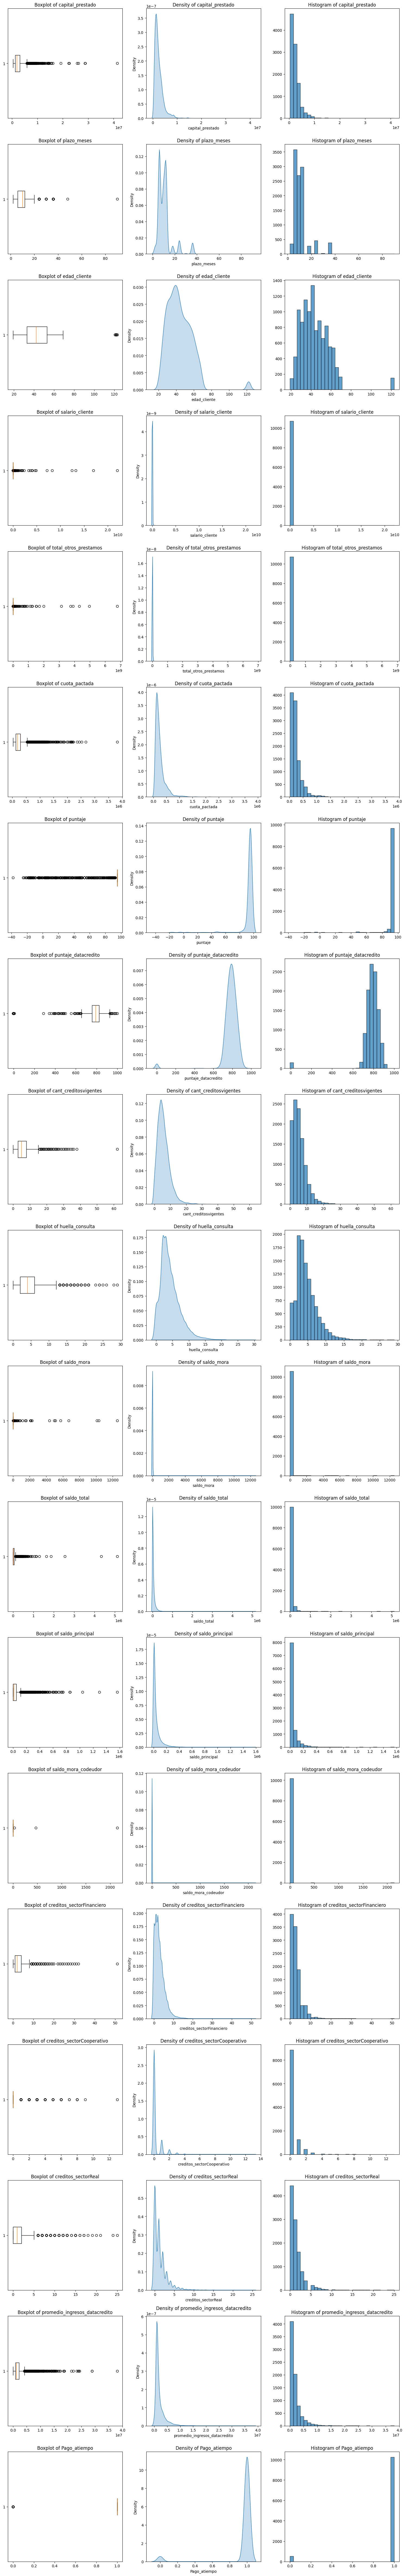

In [12]:
#Analisis de Variables Numericas

num_cols = df.select_dtypes(include=["int64","float64"]).columns

#Resumen estadístico general
resumen = df[num_cols].describe().T
resumen["skewness"] = df[num_cols].skew()
resumen["kurtosis"] = df[num_cols].kurt()
display(resumen)

#Visualización variable por variable
fig, axes = plt.subplots(nrows=len(num_cols), ncols=3, figsize=(15, 5 * len(num_cols)))

for i, col in enumerate(num_cols):
    axes[i, 0].boxplot(df[col].dropna(), vert=False)
    axes[i, 0].set_title(f"Boxplot of {col}")

    # Density plot (approximation using histogram)
    sns.kdeplot(df[col], fill=True, ax=axes[i, 1])
    axes[i, 1].set_title(f"Density of {col}")

    # Histogram
    axes[i, 2].hist(df[col].dropna(), bins=30, edgecolor="black", alpha=0.7)
    axes[i, 2].set_title(f"Histogram of {col}")
plt.tight_layout()
plt.show()

### Analisis:

- La distribución de capital_prestado presenta un sesgo positivo (cola hacia la derecha). El histograma refleja que la mayoría de los créditos otorgados están concentrados en valores relativamente bajos, mientras que existen algunos montos mucho más altos que generan una larga cola.
En el boxplot, el rango intercuartílico es bastante estrecho, lo que indica poca dispersión en la mayoría de los préstamos. Sin embargo, aparecen numerosos valores que podrían considerarse outliers. En este caso, es importante resaltar que, desde la perspectiva de negocio, estos valores no necesariamente son errores, sino que pueden corresponder a clientes con préstamos de mayor cuantía.

- La variable edad_cliente muestra una distribución relativamente equilibrada, con un mayor volumen de clientes entre los 35 y 55 años, lo cual corresponde a la población económicamente activa que suele acceder más a créditos.
El boxplot confirma que la densidad se concentra en este rango, pero también evidencia valores atípicos: aparecen clientes registrados con más de 120 años, lo cual claramente es inconsistente con la realidad.

- La variable cuota_pactada también se encuentra sesgada a la derecha. El histograma muestra que la mayoría de las cuotas son relativamente bajas, pero existen casos con cuotas muy altas.
El gráfico de cajas revela un rango intercuartílico muy estrecho, lo que significa que la mayoría de las cuotas están en valores similares, aunque acompañadas de una gran cantidad de puntos atípicos. En este caso, es probable que estas cuotas altas no representen errores, sino clientes con préstamos de gran tamaño o plazos cortos que generan cuotas elevadas.

- La variable cant_creditosvigentes presenta una distribución con fuerte sesgo a la derecha. La mayoría de los clientes tienen entre 2 y 8 créditos vigentes, pero se observan valores muy elevados (algunos registros con 60 créditos activos).
Este tipo de valores son poco comunes e incluso extraños para un escenario real, pues difícilmente un cliente podría mantener tal número de obligaciones simultáneamente. Esto sugiere problemas de calidad de datos o casos muy específicos (como clientes empresariales).

### Tabla pivote para variables númericas con bins

In [13]:
#Tabla pivote numericas

def tabla_pivote_numerica(df, col, bins=5):
    """
    Genera tabla pivote de frecuencias para variable numérica, agrupada en bins
    """
    # Crea bins (ejemplo: 5 intervalos iguales)
    rangos = pd.cut(df[col], bins=bins)

    # Tabla con conteo y % relativo
    tabla = df.groupby(rangos)[col].count().reset_index(name="conteo")
    tabla["%"] = (tabla["conteo"] / len(df) * 100).round(2)
    return tabla

for col in num_cols:
    print(f"\nTabla pivote para {col}")
    display(tabla_pivote_numerica(df, col, bins=5))


Tabla pivote para capital_prestado


C:\Users\nicol\AppData\Local\Temp\ipykernel_28268\459076719.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla = df.groupby(rangos)[col].count().reset_index(name="conteo")


capital_prestado  conteo     %
0    (318915.847, 8576830.56]   10615 98.62
1   (8576830.56, 16793661.12]     140  1.30
2  (16793661.12, 25010491.68]       3  0.03
3  (25010491.68, 33227322.24]       4  0.04
4   (33227322.24, 41444152.8]       1  0.01


Tabla pivote para plazo_meses


C:\Users\nicol\AppData\Local\Temp\ipykernel_28268\459076719.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla = df.groupby(rangos)[col].count().reset_index(name="conteo")


plazo_meses  conteo     %
0  (1.912, 19.6]    9880 91.80
1   (19.6, 37.2]     881  8.19
2   (37.2, 54.8]       1  0.01
3   (54.8, 72.4]       0  0.00
4   (72.4, 90.0]       1  0.01


Tabla pivote para edad_cliente


C:\Users\nicol\AppData\Local\Temp\ipykernel_28268\459076719.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla = df.groupby(rangos)[col].count().reset_index(name="conteo")


edad_cliente  conteo     %
0  (18.896, 39.8]    4614 42.87
1    (39.8, 60.6]    5012 46.57
2    (60.6, 81.4]     987  9.17
3   (81.4, 102.2]       0  0.00
4  (102.2, 123.0]     150  1.39


Tabla pivote para salario_cliente


C:\Users\nicol\AppData\Local\Temp\ipykernel_28268\459076719.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla = df.groupby(rangos)[col].count().reset_index(name="conteo")


salario_cliente  conteo     %
0     (-22000000.0, 4400000000.0]   10755 99.93
1    (4400000000.0, 8800000000.0]       4  0.04
2   (8800000000.0, 13200000000.0]       1  0.01
3  (13200000000.0, 17600000000.0]       2  0.02
4  (17600000000.0, 22000000000.0]       1  0.01


Tabla pivote para total_otros_prestamos


C:\Users\nicol\AppData\Local\Temp\ipykernel_28268\459076719.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla = df.groupby(rangos)[col].count().reset_index(name="conteo")


total_otros_prestamos  conteo     %
0  (-6787675.263, 1357535052.6]   10753 99.91
1  (1357535052.6, 2715070105.2]       4  0.04
2  (2715070105.2, 4072605157.8]       3  0.03
3  (4072605157.8, 5430140210.4]       2  0.02
4  (5430140210.4, 6787675263.0]       1  0.01


Tabla pivote para cuota_pactada


C:\Users\nicol\AppData\Local\Temp\ipykernel_28268\459076719.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla = df.groupby(rangos)[col].count().reset_index(name="conteo")


cuota_pactada  conteo     %
0   (20151.192, 782505.6]   10501 97.57
1   (782505.6, 1541067.2]     227  2.11
2  (1541067.2, 2299628.8]      30  0.28
3  (2299628.8, 3058190.4]       4  0.04
4  (3058190.4, 3816752.0]       1  0.01


Tabla pivote para puntaje


C:\Users\nicol\AppData\Local\Temp\ipykernel_28268\459076719.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla = df.groupby(rangos)[col].count().reset_index(name="conteo")


puntaje  conteo     %
0  (-38.143, -11.362]      67  0.62
1   (-11.362, 15.285]     140  1.30
2    (15.285, 41.933]     121  1.12
3     (41.933, 68.58]     210  1.95
4     (68.58, 95.228]   10225 95.00


Tabla pivote para puntaje_datacredito


C:\Users\nicol\AppData\Local\Temp\ipykernel_28268\459076719.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla = df.groupby(rangos)[col].count().reset_index(name="conteo")


puntaje_datacredito  conteo     %
0     (-8.006, 194.2]     147  1.37
1      (194.2, 395.4]       6  0.06
2      (395.4, 596.6]      19  0.18
3      (596.6, 797.8]    5796 53.85
4      (797.8, 999.0]    4789 44.50


Tabla pivote para cant_creditosvigentes


C:\Users\nicol\AppData\Local\Temp\ipykernel_28268\459076719.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla = df.groupby(rangos)[col].count().reset_index(name="conteo")


cant_creditosvigentes  conteo     %
0        (-0.062, 12.4]   10176 94.55
1          (12.4, 24.8]     550  5.11
2          (24.8, 37.2]      35  0.33
3          (37.2, 49.6]       1  0.01
4          (49.6, 62.0]       1  0.01


Tabla pivote para huella_consulta


C:\Users\nicol\AppData\Local\Temp\ipykernel_28268\459076719.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla = df.groupby(rangos)[col].count().reset_index(name="conteo")


huella_consulta  conteo     %
0   (-0.029, 5.8]    7904 73.44
1     (5.8, 11.6]    2562 23.80
2    (11.6, 17.4]     262  2.43
3    (17.4, 23.2]      29  0.27
4    (23.2, 29.0]       6  0.06


Tabla pivote para saldo_mora


C:\Users\nicol\AppData\Local\Temp\ipykernel_28268\459076719.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla = df.groupby(rangos)[col].count().reset_index(name="conteo")


saldo_mora  conteo     %
0   (-12.534, 2506.8]   10599 98.48
1    (2506.8, 5013.6]       2  0.02
2    (5013.6, 7520.4]       3  0.03
3   (7520.4, 10027.2]       0  0.00
4  (10027.2, 12534.0]       3  0.03


Tabla pivote para saldo_total


C:\Users\nicol\AppData\Local\Temp\ipykernel_28268\459076719.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla = df.groupby(rangos)[col].count().reset_index(name="conteo")


saldo_total  conteo     %
0  (-5116.066, 1023213.2]   10598 98.47
1  (1023213.2, 2046426.4]       6  0.06
2  (2046426.4, 3069639.6]       1  0.01
3  (3069639.6, 4092852.8]       0  0.00
4  (4092852.8, 5116066.0]       2  0.02


Tabla pivote para saldo_principal


C:\Users\nicol\AppData\Local\Temp\ipykernel_28268\459076719.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla = df.groupby(rangos)[col].count().reset_index(name="conteo")


saldo_principal  conteo     %
0   (-1562.285, 312457.0]   10239 95.13
1    (312457.0, 624914.0]     105  0.98
2    (624914.0, 937371.0]      11  0.10
3   (937371.0, 1249828.0]       1  0.01
4  (1249828.0, 1562285.0]       2  0.02


Tabla pivote para saldo_mora_codeudor


C:\Users\nicol\AppData\Local\Temp\ipykernel_28268\459076719.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla = df.groupby(rangos)[col].count().reset_index(name="conteo")


saldo_mora_codeudor  conteo     %
0     (-2.145, 429.0]   10171 94.50
1      (429.0, 858.0]       1  0.01
2     (858.0, 1287.0]       0  0.00
3    (1287.0, 1716.0]       0  0.00
4    (1716.0, 2145.0]       1  0.01


Tabla pivote para creditos_sectorFinanciero


C:\Users\nicol\AppData\Local\Temp\ipykernel_28268\459076719.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla = df.groupby(rangos)[col].count().reset_index(name="conteo")


creditos_sectorFinanciero  conteo     %
0            (-0.051, 10.2]   10585 98.35
1              (10.2, 20.4]     162  1.51
2              (20.4, 30.6]      13  0.12
3              (30.6, 40.8]       2  0.02
4              (40.8, 51.0]       1  0.01

C:\Users\nicol\AppData\Local\Temp\ipykernel_28268\459076719.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla = df.groupby(rangos)[col].count().reset_index(name="conteo")



Tabla pivote para creditos_sectorCooperativo


creditos_sectorCooperativo  conteo     %
0              (-0.013, 2.6]   10546 97.98
1                 (2.6, 5.2]     197  1.83
2                 (5.2, 7.8]      14  0.13
3                (7.8, 10.4]       5  0.05
4               (10.4, 13.0]       1  0.01


Tabla pivote para creditos_sectorReal


C:\Users\nicol\AppData\Local\Temp\ipykernel_28268\459076719.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla = df.groupby(rangos)[col].count().reset_index(name="conteo")


creditos_sectorReal  conteo     %
0       (-0.025, 5.0]   10413 96.75
1         (5.0, 10.0]     299  2.78
2        (10.0, 15.0]      41  0.38
3        (15.0, 20.0]       7  0.07
4        (20.0, 25.0]       3  0.03


Tabla pivote para promedio_ingresos_datacredito


C:\Users\nicol\AppData\Local\Temp\ipykernel_28268\459076719.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla = df.groupby(rangos)[col].count().reset_index(name="conteo")


promedio_ingresos_datacredito  conteo     %
0       (-38106.581, 7621316.2]    7625 70.84
1       (7621316.2, 15242632.4]     184  1.71
2      (15242632.4, 22863948.6]      17  0.16
3      (22863948.6, 30485264.8]       6  0.06
4      (30485264.8, 38106581.0]       1  0.01


Tabla pivote para Pago_atiempo


C:\Users\nicol\AppData\Local\Temp\ipykernel_28268\459076719.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla = df.groupby(rangos)[col].count().reset_index(name="conteo")


Pago_atiempo  conteo     %
0  (-0.001, 0.2]     511  4.75
1     (0.2, 0.4]       0  0.00
2     (0.4, 0.6]       0  0.00
3     (0.6, 0.8]       0  0.00
4     (0.8, 1.0]   10252 95.25

### Analisis:

1. **Capital Prestado:**
El 95,6% de los créditos se concentran en montos relativamente bajos (entre 0,3M y 6M). A medida que aumenta el capital, el número de registros cae drásticamente, con muy pocos casos en rangos altos (≥11M). Esto indica que el producto está diseñado principalmente para montos pequeños o medianos, mientras que los créditos de alto valor son excepcionales.

2. **Plazo en Meses:**
La mayoría de los préstamos (62%) tienen plazos cortos (≤12 meses). Un 29% está en plazos intermedios (12–20 meses) y solo un pequeño porcentaje llega a plazos largos (>30 meses).

3. **Edad del Cliente:**
Los clientes se concentran entre los 29 y 49 años (56% de la población). Hay un 17% adicional entre 49–59 años. Valores por encima de 69 años representan solo un 9,4%, por lo tanto el rango de edad es coherente con la población económicamente activa. Sin embargo, se detectaron registros atípicos con edades muy elevadas (>100 años), que deben ser tratados como errores de calidad de datos.

4. **Puntaje Datacrédito:**
El 81% de los clientes tienen puntajes altos (>746), lo cual habla de un perfil mayormente solvente. Solo un 18% cae en rangos intermedios y apenas 19 clientes tienen puntajes "regulares". El dataset está muy sesgado a buenos clientes, lo cual puede dificultar entrenar modelos que predigan bien la mora.

5. **Variable Objetivo (Pago a Tiempo):**
El 95,6% de los registros corresponden a clientes que pagaron a tiempo, mientras que solo el 4,4% son morosos. El target está altamente desbalanceado, lo que requerirá técnicas de balanceo (oversampling/undersampling) al momento de entrenar un modelo.

### Variables categoricas

In [14]:
# Revisamos y solucionamos problema de calidad de datos en variable tendencia ingresos
df["tendencia_ingresos"].value_counts()

tendencia_ingresos
Creciente      5294
Decreciente    1291
Estable        1188
0                 7
8315              6
1000000           4
9147              2
-101368           1
-70715            1
-164315           1
-435177           1
-224714           1
-702927           1
-566272           1
5697              1
3978              1
-4105             1
-288              1
-28589            1
9090              1
10808             1
15090             1
24702             1
31837             1
52862             1
54683             1
15245             1
17181             1
22363             1
22832             1
82657             1
77975             1
75761             1
65988             1
86286             1
122727            1
146918            1
158042            1
417087            1
209090            1
173031            1
168750            1
2029000           1
1817052           1
1123000           1
4250635           1
Name: count, dtype: int64

In [15]:
import numpy as np
import pandas as pd

validos = ["Creciente", "Decreciente", "Estable"]

# Reemplazamos los valores no válidos por NaN
df.loc[~df["tendencia_ingresos"].isin(validos), "tendencia_ingresos"] = np.nan

# Si la columna es categórica, eliminamos categorías no usadas
if pd.api.types.is_categorical_dtype(df["tendencia_ingresos"]):
    df["tendencia_ingresos"] = df["tendencia_ingresos"].cat.remove_unused_categories()

print(df["tendencia_ingresos"].value_counts(dropna=False))


C:\Users\nicol\AppData\Local\Temp\ipykernel_28268\3430778459.py:10: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df["tendencia_ingresos"]):


tendencia_ingresos
Creciente      5294
NaN            2990
Decreciente    1291
Estable        1188
Name: count, dtype: int64


C:\Users\nicol\AppData\Local\Temp\ipykernel_28268\1169866205.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette="viridis")


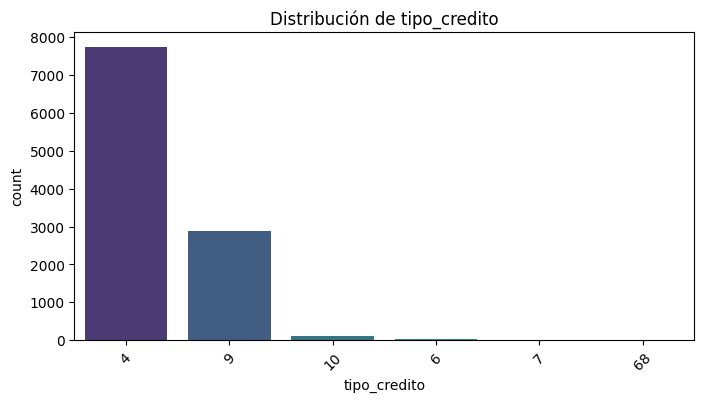

C:\Users\nicol\AppData\Local\Temp\ipykernel_28268\1169866205.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette="viridis")


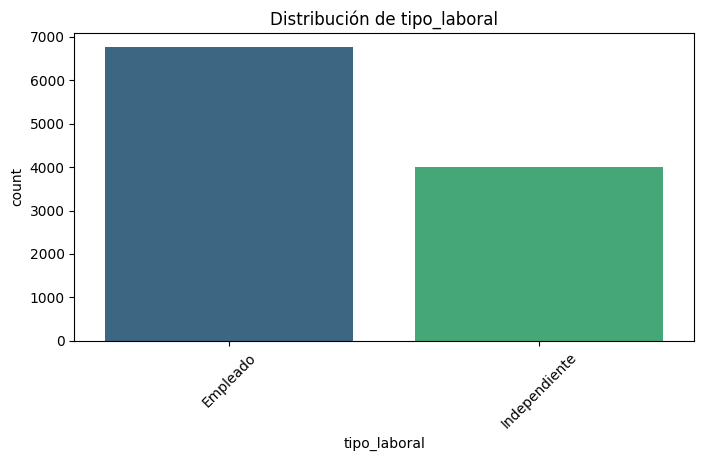

C:\Users\nicol\AppData\Local\Temp\ipykernel_28268\1169866205.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette="viridis")


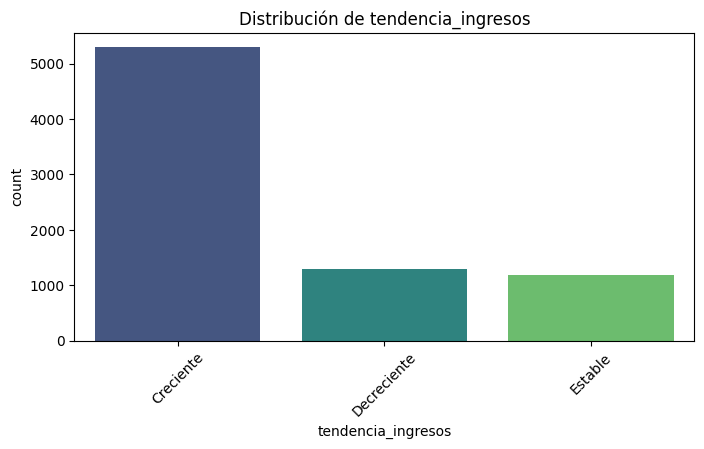

In [16]:
#Analisis de variables categoricas

cat_cols = df.select_dtypes(include=["object","category"]).columns

#Visualización
for col in cat_cols:
    plt.figure(figsize=(8,4))
    order = df[col].value_counts().index  # ordena de mayor a menor
    sns.countplot(data=df, x=col, order=order, palette="viridis")
    plt.title(f"Distribución de {col}")
    plt.xticks(rotation=45)
    plt.show()


### Analisis:

1. **Tipo de Crédito:** La categoría 4 concentra casi tres cuartas partes de los registros (74%), seguida por el tipo 9 con un 25%. Las demás categorías (10, 6, 7, 68) son prácticamente residuales, cada una con menos del 1% de los casos.


2. **Tipo Laboral:** El 70% de los clientes son Empleados, mientras que el 30% son Independientes. La proporción refleja un mercado más formal, con mayor peso de trabajadores con ingresos fijos. Existe un desbalance moderado en la distribución, aunque no extremo. A nivel de negocio, los empleados suelen percibirse como de menor riesgo por estabilidad de ingresos, mientras que los independientes pueden representar un perfil más volátil. Este contraste es interesante de analizar frente al comportamiento de pago.

3. **Tendencia de Ingresos:** La mayoría de los clientes tienen ingresos en tendencia creciente (68%). Un 16,6% está en decreciente y un 15,3% en estable.
La variable refleja un claro sesgo hacia clientes con ingresos en crecimiento,esto puede indicar que el dataset está compuesto por clientes con buen historial financiero. Sin embargo, las categorías “decreciente” y “estable” también tienen representación suficiente para ser consideradas en un modelo. Puede ser un predictor interesante para la mora, ya que una tendencia decreciente puede asociarse con mayor probabilidad de incumplimiento.

Tablas pivote para variables categoricas

In [17]:
#Tabla pivote categoricas

def tabla_pivote_categorica(df, col):

    tabla = df[col].value_counts(dropna=False).reset_index()
    tabla.columns = [col, "conteo"]
    tabla["%"] = (tabla["conteo"] / len(df) * 100).round(2)
    return tabla

for col in cat_cols:
    print(f"\nTabla pivote para {col}")
    display(tabla_pivote_categorica(df, col))


Tabla pivote para tipo_credito


tipo_credito  conteo     %
0            4    7747 71.98
1            9    2876 26.72
2           10     116  1.08
3            6      21  0.20
4            7       2  0.02
5           68       1  0.01


Tabla pivote para tipo_laboral


tipo_laboral  conteo     %
0       Empleado    6754 62.75
1  Independiente    4009 37.25


Tabla pivote para tendencia_ingresos


tendencia_ingresos  conteo     %
0          Creciente    5294 49.19
1                NaN    2990 27.78
2        Decreciente    1291 11.99
3            Estable    1188 11.04

### Analisis Bivariable

Analisis de variables numericas con la variable objetivo [Pago_atiempo]

C:\Users\nicol\AppData\Local\Temp\ipykernel_28268\440241803.py:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


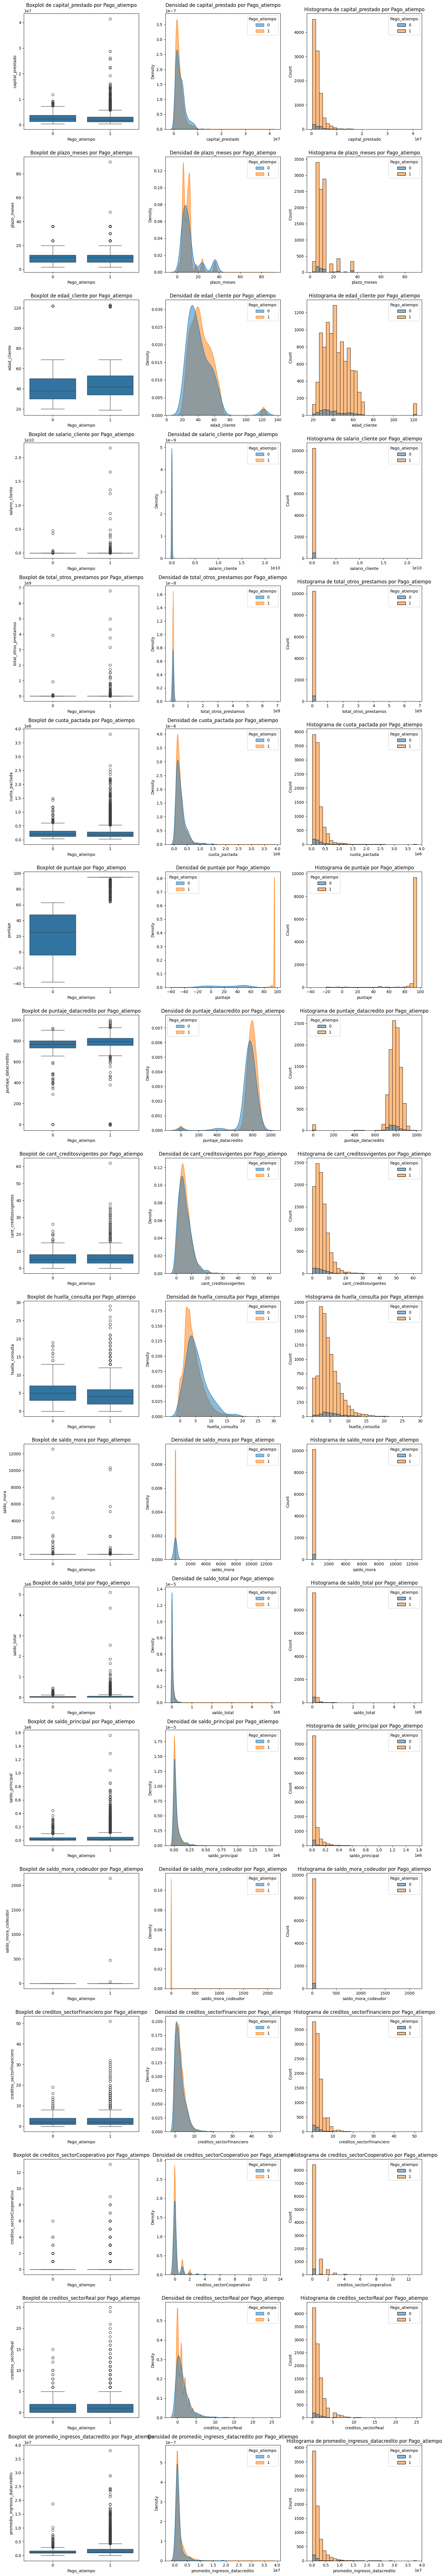

In [18]:
num_cols = df.select_dtypes(include=["int64","float64"]).columns.drop("Pago_atiempo")

fig, axes = plt.subplots(nrows=len(num_cols), ncols=3, figsize=(15, 5 * len(num_cols)))

for i, col in enumerate(num_cols):
    sns.boxplot(x="Pago_atiempo", y=col, data=df, ax=axes[i, 0])
    axes[i, 0].set_title(f"Boxplot de {col} por Pago_atiempo")

    sns.kdeplot(
        data=df,
        x=col,
        hue="Pago_atiempo",
        fill=True,
        common_norm=False,
        alpha=0.5,
        ax=axes[i, 1],
    )
    axes[i, 1].set_title(f"Densidad de {col} por Pago_atiempo")

    sns.histplot(data=df, x=col, hue="Pago_atiempo", bins=30, kde=False, alpha=0.5, ax=axes[i, 2])
    axes[i, 2].set_title(f"Histograma de {col} por Pago_atiempo")

plt.tight_layout()
plt.show()

# Tablas pivote por bins
def tabla_bivar_num(df, col, bins=4):
    df_tmp = df.copy()
    df_tmp[f"{col}_bin"] = pd.qcut(df_tmp[col], q=bins, duplicates="drop")
    tabla = df_tmp.groupby(f"{col}_bin")["Pago_atiempo"].agg(
        tasa_pago="mean",
        n="count"
    ).reset_index()
    tabla["tasa_pago"] = (tabla["tasa_pago"]*100).round(2)
    return tabla


Analisis de variables categoricas con variable objetivo

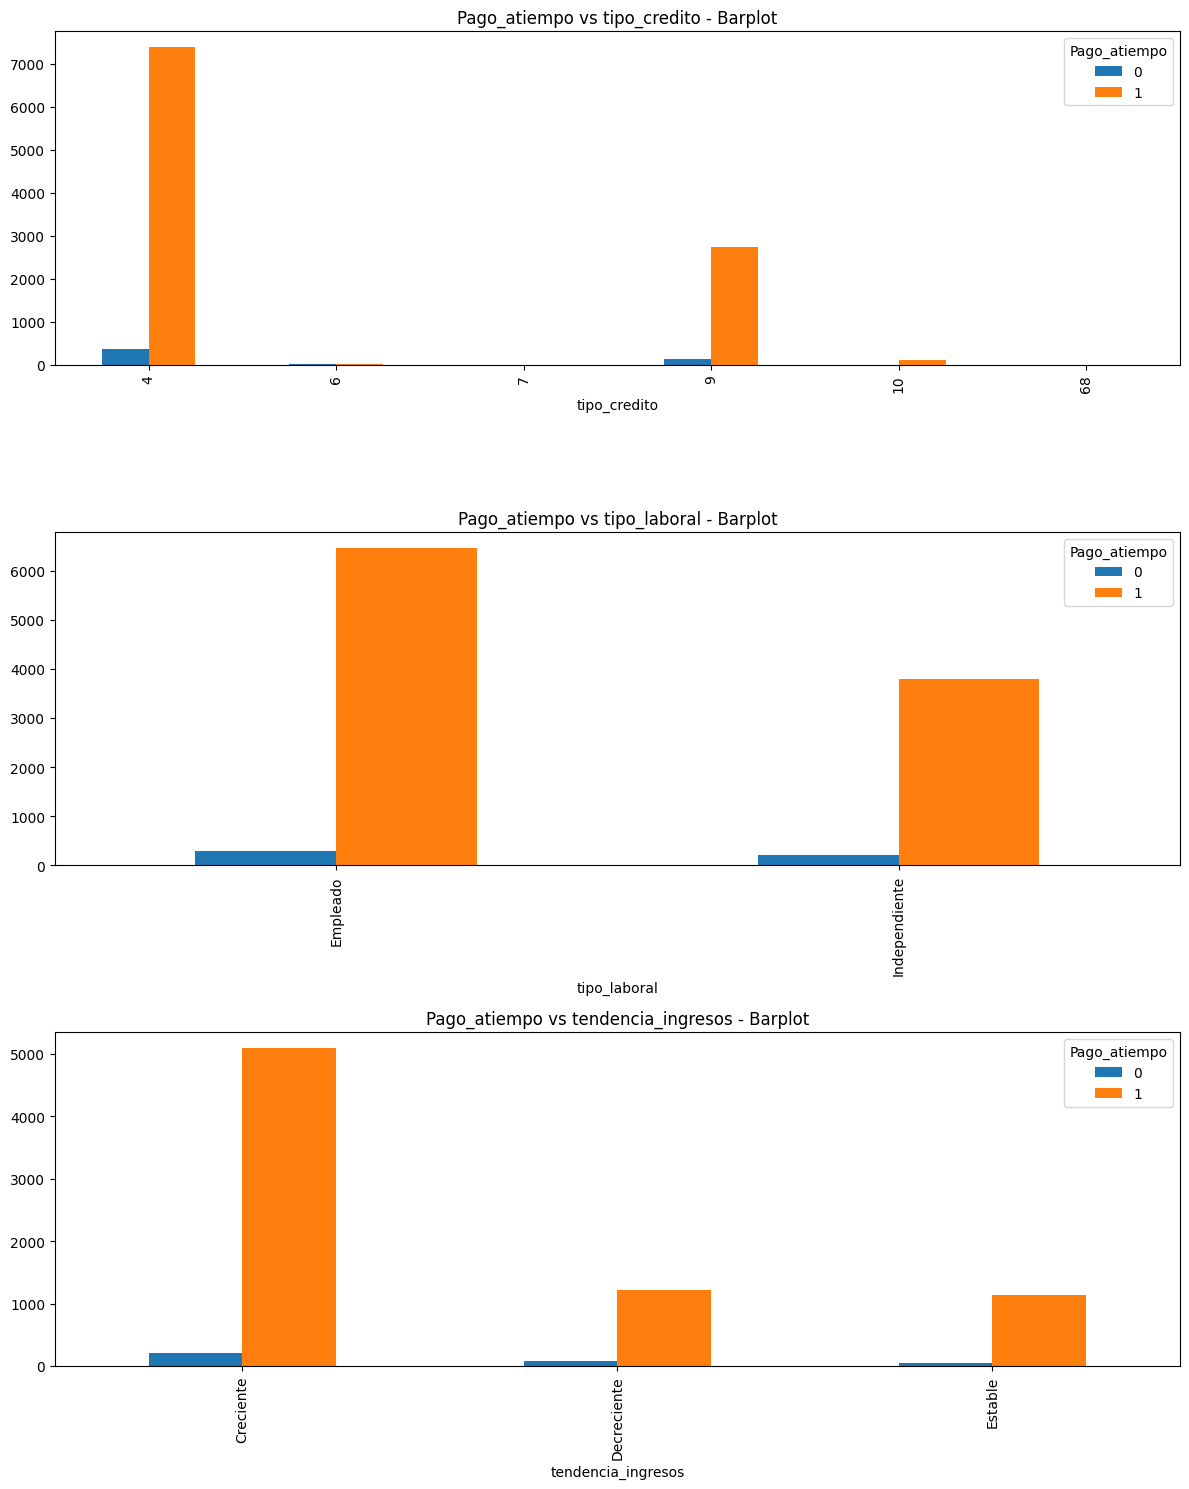

In [19]:
fig, axes = plt.subplots(nrows=len(cat_cols), ncols=1, figsize=(12, 5 * max(len(cat_cols), 1)))

for i, col in enumerate(cat_cols):
    pd.crosstab(df[col], df["Pago_atiempo"]).plot(
        kind="bar", ax=axes[i], title=f"Pago_atiempo vs {col} - Barplot"
    )
plt.tight_layout()
plt.show()

In [20]:
target = df["Pago_atiempo"]

temp = df.copy()
temp["Pago_atiempo"] = temp["Pago_atiempo"].astype("float64")

for col in cat_cols:
    heatmap = (
        pd.crosstab(df[col], target, margins=True)
        .style.background_gradient(cmap="coolwarm")
        .set_caption(f"Pago_atiempo vs {col} Heatmap")
    )
    display(heatmap)
    display(temp.groupby(col, observed=True).agg({"Pago_atiempo": "mean"}) * 100)

Pago_atiempo
tipo_credito              
4                    95.31
6                    57.14
7                   100.00
9                    95.27
10                   97.41
68                  100.00

Pago_atiempo
tipo_laboral               
Empleado              95.71
Independiente         94.49

Pago_atiempo
tendencia_ingresos              
Creciente                  96.09
Decreciente                93.73
Estable                    95.37

### Analisis especifico de variables importantes

Variable -> huella consulta

In [21]:
df["huella_bin"] = pd.cut(
    df["huella_consulta"],
    bins=[-1, 2, 4, 6, 10, df["huella_consulta"].max()],
    labels=["0-2", "3-4", "5-6", "7-10", "10+"]
)


In [22]:
# Tasa de pago
tasa_pago = df.groupby("huella_bin")["Pago_atiempo"].mean() * 100

# Tasa de mora (100 - pago)
tasa_mora = 100 - tasa_pago

print(pd.DataFrame({"Tasa Pago (%)": tasa_pago, "Tasa Mora (%)": tasa_mora}))


            Tasa Pago (%)  Tasa Mora (%)
huella_bin                              
0-2                 97.07           2.93
3-4                 95.51           4.49
5-6                 94.44           5.56
7-10                93.28           6.72
10+                 89.91          10.09


C:\Users\nicol\AppData\Local\Temp\ipykernel_28268\4207608874.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tasa_pago = df.groupby("huella_bin")["Pago_atiempo"].mean() * 100


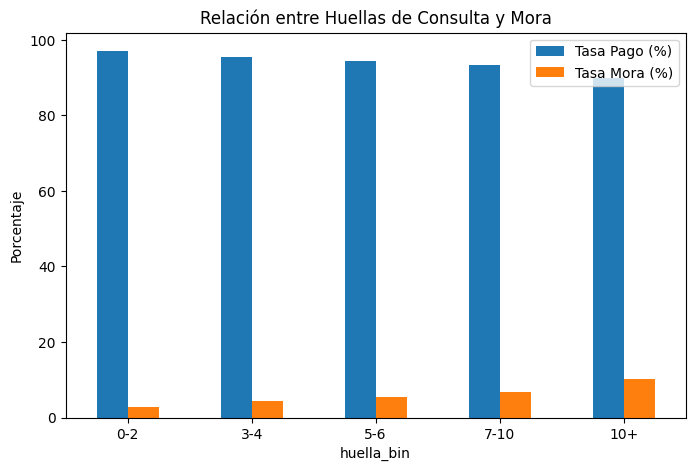

In [23]:
tasa_df = pd.DataFrame({"Tasa Pago (%)": tasa_pago, "Tasa Mora (%)": tasa_mora})

tasa_df.plot(kind="bar", figsize=(8,5))
plt.title("Relación entre Huellas de Consulta y Mora")
plt.ylabel("Porcentaje")
plt.xticks(rotation=0)
plt.show()

Variable -> plazo meses

C:\Users\nicol\AppData\Local\Temp\ipykernel_28268\899897021.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tasa_pago = df.groupby("plazo_bin")["Pago_atiempo"].mean() * 100
C:\Users\nicol\AppData\Local\Temp\ipykernel_28268\899897021.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla_plazo = df.groupby("plazo_bin")["Pago_atiempo"].agg(


           tasa_pago  tasa_mora     n
plazo_bin                            
1-6            95.24       4.76  3905
7-12           96.09       3.91  5700
13-24          93.23       6.77   753
25-60          87.38      12.62   404
60+           100.00       0.00     1


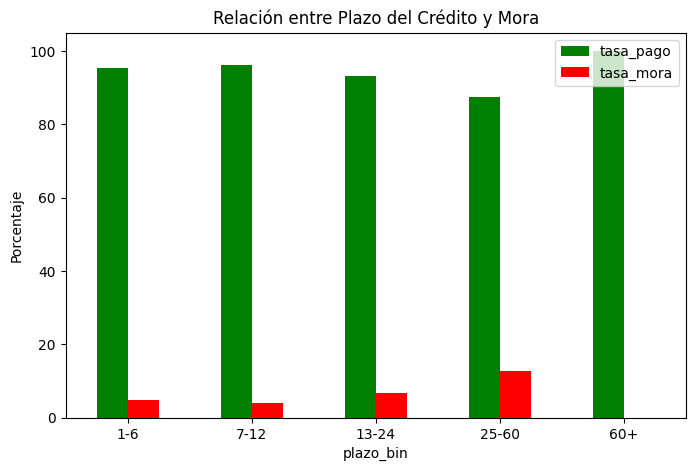

In [24]:
df["plazo_bin"] = pd.cut(
    df["plazo_meses"],
    bins=[0, 6, 12, 24, 60, df["plazo_meses"].max()],
    labels=["1-6", "7-12", "13-24", "25-60", "60+"]
)

# Tasa de pago
tasa_pago = df.groupby("plazo_bin")["Pago_atiempo"].mean() * 100

# Tasa de mora (100 - pago)
tasa_mora = 100 - tasa_pago

# Guardar en tabla con número de clientes
tabla_plazo = df.groupby("plazo_bin")["Pago_atiempo"].agg(
    tasa_pago=lambda x: x.mean()*100,
    tasa_mora=lambda x: (1 - x.mean())*100,
    n="count"
)

print(tabla_plazo)

tabla_plazo[["tasa_pago", "tasa_mora"]].plot(
    kind="bar", figsize=(8,5), color=["green","red"]
)
plt.title("Relación entre Plazo del Crédito y Mora")
plt.ylabel("Porcentaje")
plt.xticks(rotation=0)
plt.show()

### Analisis:

1. **Capital Prestado:** Tasas de pago estables (95–96%) en la mayoría de rangos bajos e intermedios. En el rango más alto (>3M) la tasa de pago baja a 92,9%, lo que indica mayor riesgo de incumplimiento en créditos grandes.

2. **Plazo en Meses:** Plazos cortos (≤12 meses) tienen tasas de pago alrededor de 95–97%. En plazos largos (≥12 meses) la tasa cae a 91,2%, la más baja de todos los bins. Por lo tanto los plazos extendidos elevan el riesgo, posiblemente por mayor exposición y dificultad en cumplir cuotas.

3. **Edad del Cliente:** Jóvenes (≤33 años) pagan menos (92,9%). El rango 33–53 años es el más cumplido (95,8–96,4%). Mayores de 53 también mantienen buena tasa (95,9%),los clientes de mediana edad son los más confiables; los más jóvenes presentan mayor riesgo de mora.

4. **Puntaje Datacrédito:** Clientes con puntajes bajos (≤757) tienen la menor tasa de pago (92%). A medida que sube el puntaje, mejora la tasa hasta 97,4% en los mejores scores.

5. **Huella de Consulta:** Hasta 2 consultas → mejor tasa (97%). Entre 2 y 6 consultas baja a 95%. Con más de 6 cae fuerte a 92,5%. Muchas consultas de crédito son un claro factor de riesgo → indicador temprano de sobreendeudamiento.



C:\Users\nicol\AppData\Local\Temp\ipykernel_28268\3663018972.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tasa = df.groupby(col)["Pago_atiempo"].mean().reset_index()
C:\Users\nicol\AppData\Local\Temp\ipykernel_28268\3663018972.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y="Pago_atiempo", data=tasa, palette="coolwarm")


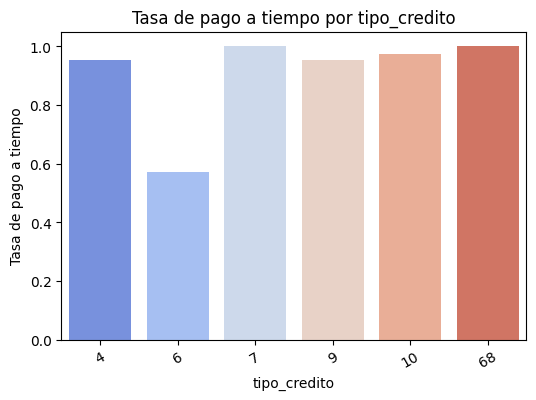

C:\Users\nicol\AppData\Local\Temp\ipykernel_28268\3663018972.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tasa = df.groupby(col)["Pago_atiempo"].mean().reset_index()
C:\Users\nicol\AppData\Local\Temp\ipykernel_28268\3663018972.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y="Pago_atiempo", data=tasa, palette="coolwarm")


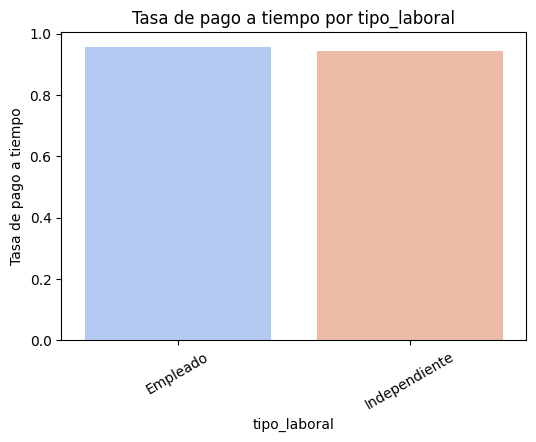

C:\Users\nicol\AppData\Local\Temp\ipykernel_28268\3663018972.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tasa = df.groupby(col)["Pago_atiempo"].mean().reset_index()
C:\Users\nicol\AppData\Local\Temp\ipykernel_28268\3663018972.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y="Pago_atiempo", data=tasa, palette="coolwarm")


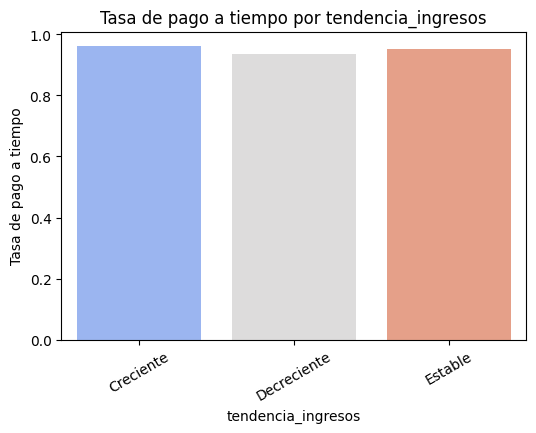


--- tipo_credito ---
  tipo_credito  tasa_pago     n
0            4      95.31  7747
1            6      57.14    21
2            7     100.00     2
3            9      95.27  2876
4           10      97.41   116
5           68     100.00     1

--- tipo_laboral ---
    tipo_laboral  tasa_pago     n
0       Empleado      95.71  6754
1  Independiente      94.49  4009

--- tendencia_ingresos ---
  tendencia_ingresos  tasa_pago     n
0          Creciente      96.09  5294
1        Decreciente      93.73  1291
2            Estable      95.37  1188


C:\Users\nicol\AppData\Local\Temp\ipykernel_28268\3663018972.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla = df.groupby(col)["Pago_atiempo"].agg(
C:\Users\nicol\AppData\Local\Temp\ipykernel_28268\3663018972.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla = df.groupby(col)["Pago_atiempo"].agg(
C:\Users\nicol\AppData\Local\Temp\ipykernel_28268\3663018972.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warnin

In [25]:
# Graficas bivariable de categoricas y tablas pivote

def tabla_bivar_cat(df, col):
    tabla = df.groupby(col)["Pago_atiempo"].agg(
        tasa_pago="mean",
        n="count"
    ).reset_index()
    tabla["tasa_pago"] = (tabla["tasa_pago"]*100).round(2)
    return tabla

# Visualización
for col in cat_cols:
    plt.figure(figsize=(6,4))
    tasa = df.groupby(col)["Pago_atiempo"].mean().reset_index()
    sns.barplot(x=col, y="Pago_atiempo", data=tasa, palette="coolwarm")
    plt.title(f"Tasa de pago a tiempo por {col}")
    plt.ylabel("Tasa de pago a tiempo")
    plt.xticks(rotation=30)
    plt.show()

resultados_cat = {}

for col in cat_cols:
    tabla = tabla_bivar_cat(df, col)
    resultados_cat[col] = tabla
    print(f"\n--- {col} ---")
    print(tabla)


### Analisis:

1. **Tipo de Crédito:** Los tipos 4 y 9 concentran casi toda la población (5748 y 1919 registros) y muestran tasas de pago muy similares (95,6% y 95,8%). El tipo 10 tiene pocos registros pero también buen comportamiento (96,6%). Casos muy pequeños: 6 (17 registros) con baja tasa de pago: 58,8%, y los tipos 7 y 68 (1 registro cada uno) con 100%. Claramente el tipo 6 es una señal de alerta porque aunque son pocos, más de 40% no pagaron a tiempo. Las categorías con muy pocos datos (7, 68) pueden reagruparse en “otros” porque no son estadísticamente representativas.

2. **Tipo Laboral:** Aunque ambos grupos cumplen relativamente bien (para empleados 5426 registros, tasa de pago 95,9% y para independientes 2347 registros, tasa de pago 94,8%), los independientes tienen un pequeño porcentaje menos de cumplimiento. Esto confirma la hipótesis de negocio: ingresos estables (empleados) → menor riesgo; ingresos volátiles (independientes) → mayor riesgo.

3. **Tendencia de Ingresos:** La tendencia de ingresos es un predictor fuerte del riesgo. Clientes con ingresos decrecientes pagan menos que los demás. Esto tiene mucho sentido de negocio: una caída en ingresos puede comprometer la capacidad de pago.

### Analisis Multivariable

Matriz de correlación

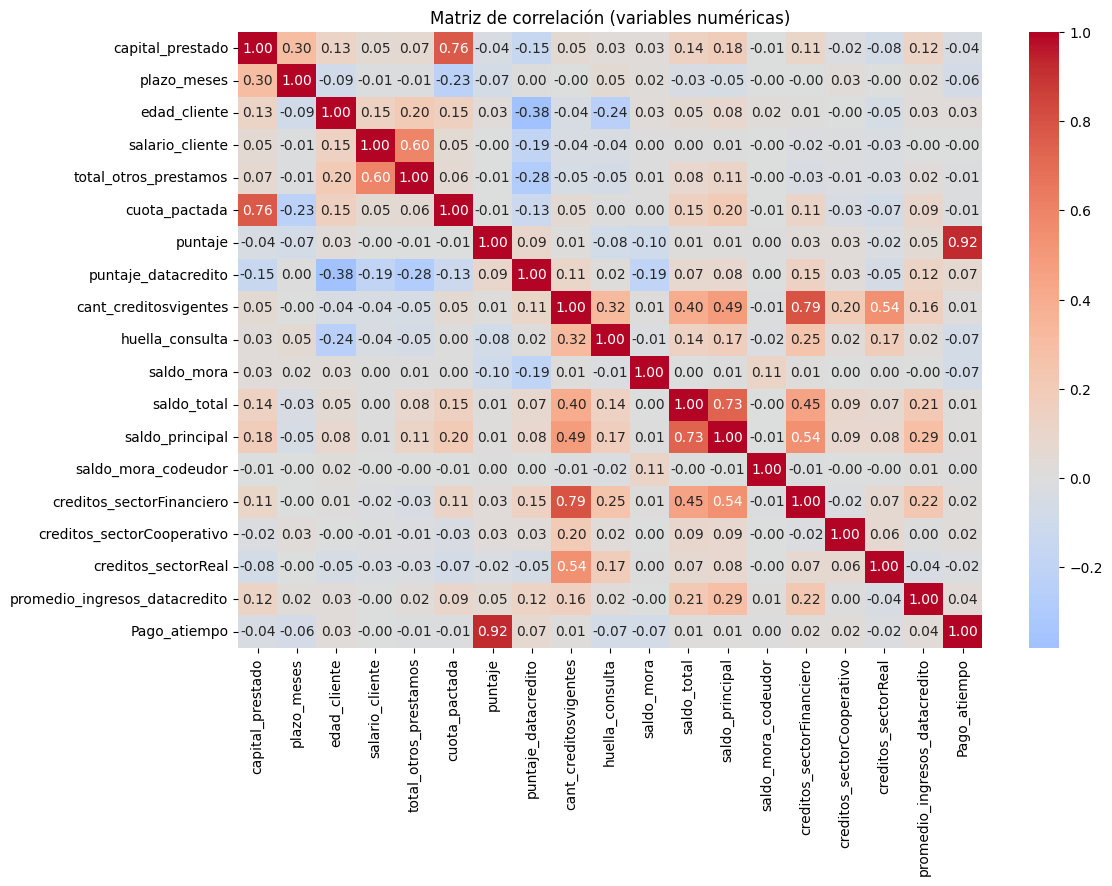

In [26]:
num_cols = df.select_dtypes(include=["int64","float64"]).columns

# Matriz de correlación
plt.figure(figsize=(12,8))
sns.heatmap(df[num_cols].corr(method="pearson"),
            annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Matriz de correlación (variables numéricas)")
plt.show()

### Analisis:

1. **Relaciones fuertes entre variables independientes (colinealidad):**

  Capital prestado ↔ Cuota pactada (0.76): Existe una correlación positiva alta, lo que es lógico: a mayor monto del préstamo, mayor es la cuota que debe pagar el cliente. Esto sugiere redundancia entre ambas variables; en un modelo, podría bastar con usar una sola o derivar un ratio (ej. cuota/salario) para capturar capacidad de pago.

  Total de otros préstamos ↔ Salario del cliente (0.60): Correlación moderadamente alta. Tiene sentido: clientes con mayores ingresos tienden a tener más deudas en curso, probablemente por mayor acceso a crédito. Esta relación es relevante para evaluar capacidad de endeudamiento.

  Créditos en sector financiero ↔ Cantidad de créditos vigentes (0.79): Muy fuerte. Prácticamente la cantidad de créditos vigentes está siendo explicada por la subcategoría del sector financiero. Esto indica redundancia.

  Saldo total ↔ Saldo principal (0.73): También es esperable, ya que el saldo total de la obligación está fuertemente explicado por el saldo principal. Una de las dos puede ser descartada o consolidada en un único indicador.

2. **Relación con la variable objetivo Pago_atiempo:**

  La mayoría de las variables muestran correlaciones muy bajas con el target, lo que indica que por sí solas no tienen gran poder predictivo lineal.

  Sin embargo, destaca la variable puntaje con correlación 0.92 con Pago_atiempo. Esto puede deberse a que puntaje esté calculado a partir de la misma información que define el target, generando data leakage, o que puntaje ya sea en esencia una variable de riesgo construida para reflejar el comportamiento de pago. En cualquier caso es conveniente no usar esta variable hasta entender como es que se calcula.

Pairplot

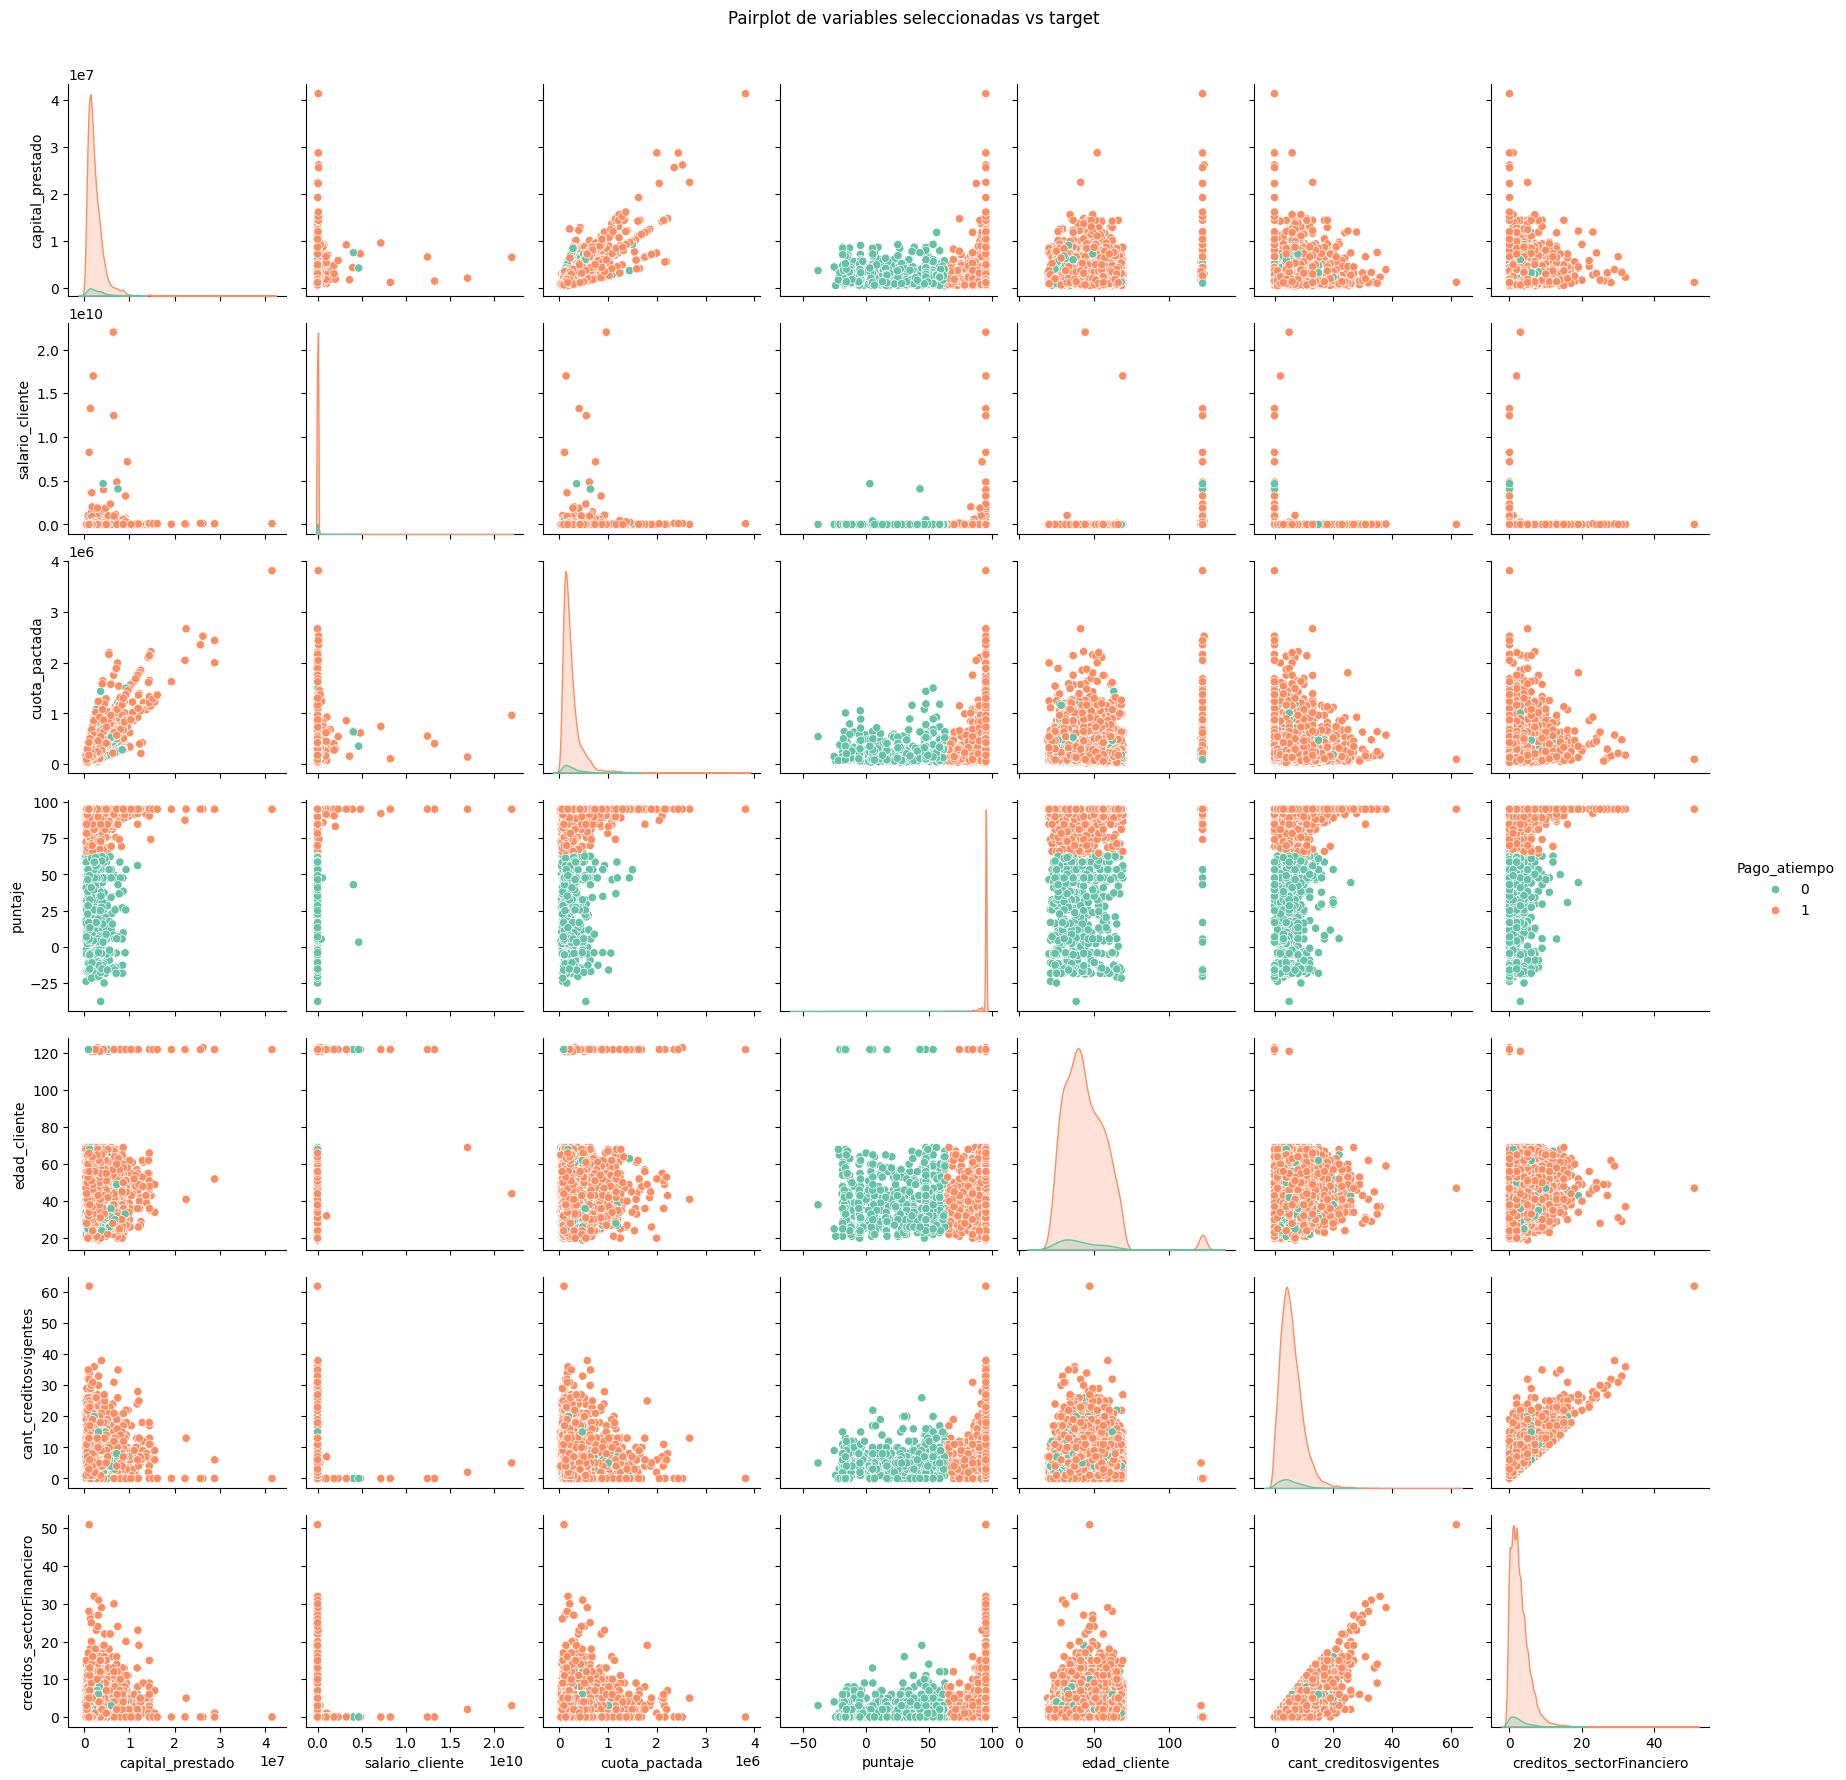

In [27]:
#Pairplot
subset = ["capital_prestado", "salario_cliente", "cuota_pactada", "puntaje", "edad_cliente", "Pago_atiempo", "cant_creditosvigentes", "creditos_sectorFinanciero"]

sns.pairplot(df[subset], hue="Pago_atiempo", diag_kind="kde", palette="Set2")
plt.suptitle("Pairplot de variables seleccionadas vs target", y=1.02)
plt.show()


### Analisis:

En todos los cruces, puntaje actúa como variable central que separa buenos y malos pagadores.

Otras variables como capital prestado, cuota pactada, edad y exposición crediticia aportan matices, pero la frontera real está definida por el puntaje.

Esto confirma lo que ya vimos en la matriz de correlación, el puntaje está fuertemente asociado con Pago_atiempo.

Grafica de distribucion entre tipo credito y variable onjetivo Pago_atiempo

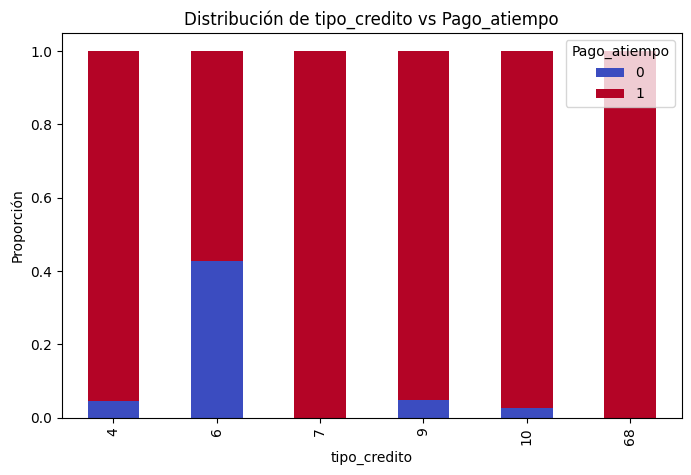

In [28]:
#Distribucion del tipo de credito con el pago a tiempo
cat = "tipo_credito"
tabla = pd.crosstab(df[cat], df["Pago_atiempo"], normalize="index")

tabla.plot(kind="bar", stacked=True, figsize=(8,5), colormap="coolwarm")
plt.title(f"Distribución de {cat} vs Pago_atiempo")
plt.ylabel("Proporción")
plt.legend(title="Pago_atiempo")
plt.show()


Analisis tipo laboral con tipo credito

In [29]:
pd.crosstab(df["tipo_laboral"], df["tipo_credito"], normalize="index") * 100

tipo_credito      4    6    7     9   10   68
tipo_laboral                                 
Empleado      74.80 0.31 0.01 23.75 1.11 0.01
Independiente 67.22 0.00 0.02 31.73 1.02 0.00

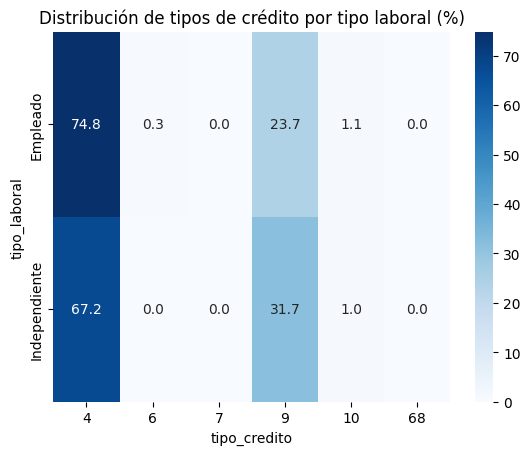

In [30]:
tabla = pd.crosstab(df["tipo_laboral"], df["tipo_credito"], normalize="index") * 100
sns.heatmap(tabla, annot=True, fmt=".1f", cmap="Blues")
plt.title("Distribución de tipos de crédito por tipo laboral (%)")
plt.show()


### Analisis:

Los empleados están más concentrados en tipo 4 (tradicional).

Los independientes se reparten más entre 4 y 9, con un sesgo mayor hacia el 9.

Esto puede reflejar que las características del crédito 9 son más atractivas para clientes con ingresos informales o variables.

Analisis edad con tipos de credito

In [31]:
df["edad_bin"] = pd.cut(df["edad_cliente"], bins=[18, 30, 40, 50, 60, 120])

pd.crosstab(df["edad_bin"], df["tipo_credito"], normalize="index") * 100

tipo_credito     4    6    7     9   10   68
edad_bin                                    
(18, 30]     76.51 0.21 0.05 22.20 0.97 0.05
(30, 40]     73.34 0.29 0.00 25.36 1.00 0.00
(40, 50]     72.21 0.11 0.04 26.65 0.99 0.00
(50, 60]     71.10 0.15 0.00 27.61 1.13 0.00
(60, 120]    71.02 0.20 0.00 26.95 1.82 0.00

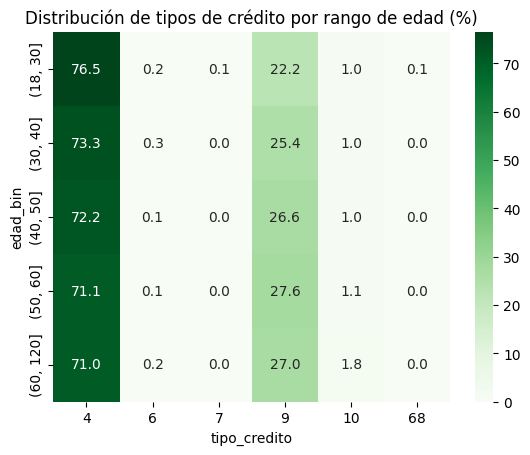

In [32]:
tabla = pd.crosstab(df["edad_bin"], df["tipo_credito"], normalize="index") * 100
sns.heatmap(tabla, annot=True, fmt=".1f", cmap="Greens")
plt.title("Distribución de tipos de crédito por rango de edad (%)")
plt.show()

### Analisis:

La mayoría de tipos (4, 9, 10, 7, 68) muestran cumplimiento muy alto (barra casi toda roja = pago a tiempo).

El tipo 6 destaca negativamente: la barra muestra más de 40% en azul (mora). Esto confirma lo visto en los bivariados, aunque son pocos casos, el producto tipo 6 está asociado a alto riesgo.

En general, el tipo de crédito no diferencia mucho el riesgo, salvo el tipo 6 que sí muestra una proporción de incumplimiento inusualmente alta. Para negocio/modelo, los tipos minoritarios (6, 7, 68) conviene tratarlos como “otros” o analizarlos con detalle porque no tienen suficiente volumen para ser estadísticamente confiables.

### **Analisis de posibles variables derivadas/calculadas:**

# 1. **Ratios de endeudamiento**

- cuota_pactada / salario_cliente → mide el esfuerzo de pago mensual respecto a los ingresos.

- total_otros_prestamos / salario_cliente → captura la carga financiera total en relación al ingreso.

- saldo_total / salario_cliente → indicador de sobreendeudamiento.

  Clientes con ratios muy altos tienden a tener más riesgo de impago.

# 2. **Historial crediticio**

- cant_creditosvigentes / edad_cliente → intensidad crediticia relativa a la edad.

# 3. **Comportamiento con DataCrédito**

- huella_consulta / cant_creditosvigentes → mide frecuencia de consultas por crédito frente al número de créditos reales. Puede reflejar clientes "crédito-dependientes".

- promedio_ingresos_datacredito / salario_cliente → discrepancia entre ingresos reportados en DataCrédito vs. declarados.

  Nos puede ayudar a detectar informacion inconsistente

# 4. **Interacciones clave**

- puntaje * cuota_pactada / salario_cliente → combinación entre score crediticio y carga financiera.

- tendencia_ingresos + cant_creditosvigentes → clientes con ingresos decrecientes y muchos créditos son más riesgosos.

- empleado vs independiente * huella_consulta → el efecto de las consultas puede variar por tipo de laboralidad.

### **Variables Derivadas**

Variables temporales

In [33]:
# Crear mes del préstamo
df["mes_prestamo"] = df["fecha_prestamo"].dt.month

# Tabla pivote con tasa de pago
tabla_mes = df.groupby("mes_prestamo")["Pago_atiempo"].agg(
    tasa_pago="mean",
    n="count"
).reset_index()
tabla_mes["tasa_pago"] = (tabla_mes["tasa_pago"]*100).round(2)

print(tabla_mes)

    mes_prestamo  tasa_pago     n
0              1      95.45  2044
1              2      94.10  1170
2              3      94.89  1155
3              4      93.71  1113
4              5      95.66  1083
5              6      96.24   665
6              7      96.89   644
7              8      96.40   555
8              9      98.06   361
9             10      98.27   231
10            11      94.32   352
11            12      94.46  1390


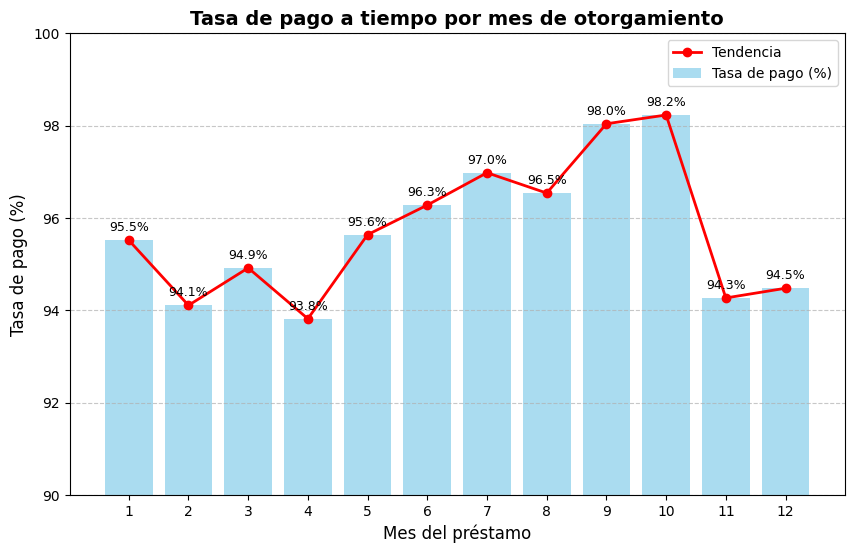

In [34]:
data = {
    "mes_prestamo": [1,2,3,4,5,6,7,8,9,10,11,12],
    "tasa_pago": [95.52, 94.11, 94.92, 93.82, 95.64, 96.28, 96.98, 96.54, 98.04, 98.23, 94.27, 94.48],
    "n": [2029, 1155, 1142, 1100, 1054, 645, 629, 549, 357, 226, 349, 1378]
}

df_mes = pd.DataFrame(data)
plt.figure(figsize=(10,6))

plt.bar(df_mes["mes_prestamo"], df_mes["tasa_pago"],
        color="skyblue", alpha=0.7, label="Tasa de pago (%)")

plt.plot(df_mes["mes_prestamo"], df_mes["tasa_pago"],
         color="red", marker="o", linewidth=2, label="Tendencia")

for i, val in enumerate(df_mes["tasa_pago"]):
    plt.text(df_mes["mes_prestamo"][i], val+0.2, f"{val:.1f}%", ha="center", fontsize=9)

plt.title("Tasa de pago a tiempo por mes de otorgamiento", fontsize=14, weight="bold")
plt.xlabel("Mes del préstamo", fontsize=12)
plt.ylabel("Tasa de pago (%)", fontsize=12)
plt.xticks(range(1,13))
plt.ylim(90, 100)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

### Analisis de pagos por mes:

- Meses con mejor comportamiento:

  Septiembre (98.04%) y Octubre (98.23%) destacan con las tasas de pago más altas.

  Julio (96.98%) y Agosto (96.54%) también presentan tasas muy positivas.
  Esto sugiere que los préstamos otorgados en segundo semestre tienden a pagarse con mayor puntualidad.

- Meses con menor desempeño:

  Abril (93.82%) y Febrero (94.11%) muestran las tasas más bajas de pago a tiempo.

  Noviembre y Diciembre también están en la franja baja (~94%).
  Podría reflejar efectos de gasto estacional (ej. fin de año o inicio de año escolar).

- Meses intermedios:

  Enero (95.52%), Marzo (94.92%) y Mayo (95.64%) se encuentran cercanos al promedio.

  antiguedad_bin  tasa_pago     n
0  (-8.001, 2.0]      96.70  2670
1     (2.0, 4.0]      95.67  1915
2     (4.0, 6.0]      93.92  2238
3     (6.0, 8.0]      95.25  3113
4     (8.0, 9.0]      93.23   827


C:\Users\nicol\AppData\Local\Temp\ipykernel_28268\1701127914.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla_antiguedad = df.groupby("antiguedad_bin")["Pago_atiempo"].agg(


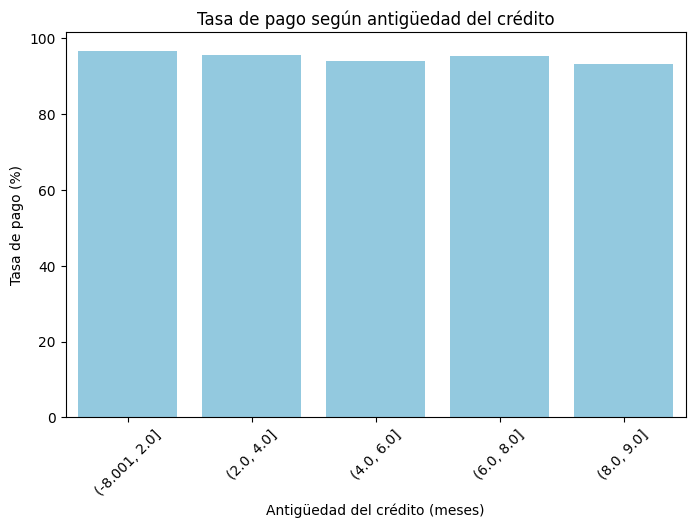

In [35]:
# Variable derivada antiguedad
df["antiguedad_credito_meses"] = ((pd.to_datetime("today") - df["fecha_prestamo"]).dt.days // 30)

df["antiguedad_bin"] = pd.qcut(df["antiguedad_credito_meses"], q=5, duplicates="drop")

tabla_antiguedad = df.groupby("antiguedad_bin")["Pago_atiempo"].agg(
    tasa_pago="mean",
    n="count"
).reset_index()
tabla_antiguedad["tasa_pago"] = (tabla_antiguedad["tasa_pago"] * 100).round(2)

print(tabla_antiguedad)

plt.figure(figsize=(8,5))
sns.barplot(data=tabla_antiguedad, x="antiguedad_bin", y="tasa_pago", color="skyblue")
plt.title("Tasa de pago según antigüedad del crédito")
plt.ylabel("Tasa de pago (%)")
plt.xlabel("Antigüedad del crédito (meses)")
plt.xticks(rotation=45)
plt.show()

- Créditos muy recientes (0–1 mes) tienen la mejor tasa de pago (96.74%). Esto puede reflejar que en los primeros meses los clientes hacen un esfuerzo fuerte por no incumplir.

- A partir de ahí, entre 1–3 meses (95.67%) y 3–5 meses (94.63%), la tasa comienza a bajar ligeramente.

- En créditos de 5–7 meses (94.83%) se mantiene baja.

- Finalmente, en los de 7–8 meses (93.89%) presentan la tasa más baja de pago, lo que indica que a mayor antigüedad, hay un deterioro en la probabilidad de pago.